In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load your data
data = pd.read_csv('1Test1.csv')  # Make sure your CSV has columns 'temperature', 'humidity', 'so2'

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data[['Temperature', 'Humidity', 'SO2']] = scaler.fit_transform(data[['Temperature', 'Humidity', 'SO2']])

# Convert data to sequences
def create_sequences(data, sequence_length=1):
    xs, ys = [], []
    for i in range(len(data)-sequence_length):
        x = data.iloc[i:(i+sequence_length), :-1]
        y = data.iloc[i+sequence_length, -1]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Use 12 months (1 year) as the sequence length
sequence_length = 12

# Create sequences
X, y = create_sequences(data, sequence_length)


In [2]:
# Split into training and testing sets
train_size = 55
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [3]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


C:\Users\kumar\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
data.fillna(0, inplace=True)

In [5]:
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.1)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

data = pd.read_csv('1Test1.csv')  # Make sure your CSV has columns 'temperature', 'humidity', 'so2'

# Replace NaN values with 0
data.fillna(0, inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data[['Temperature', 'Humidity', 'SO2']] = scaler.fit_transform(data[['Temperature', 'Humidity', 'SO2']])

# Ensure all data is float32
data[['Temperature', 'Humidity', 'SO2']] = data[['Temperature', 'Humidity', 'SO2']].astype(np.float32)

# Convert data to sequences
def create_sequences(data, sequence_length=1):
    xs, ys = [], []
    for i in range(len(data)-sequence_length):
        x = data.iloc[i:(i+sequence_length), :-1]
        y = data.iloc[i+sequence_length, -1]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Use 12 months (1 year) as the sequence length
sequence_length = 12

# Create sequences
X, y = create_sequences(data, sequence_length)

# Ensure the data is float32
X = X.astype(np.float32)
y = y.astype(np.float32)

# Split into training and testing sets
train_size = 55
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.1)


Epoch 1/200


C:\Users\kumar\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - loss: 609053573120.0000 - val_loss: 794832470016.0000
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 662416785408.0000 - val_loss: 399415869440.0000
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 398095384576.0000 - val_loss: 268955336704.0000
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 255087640576.0000 - val_loss: 250680655872.0000
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 239845572608.0000 - val_loss: 111047966720.0000
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 88886312960.0000 - val_loss: 170509205504.0000
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 179211042816.0000 - val_loss: 189918658560.0000
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 168874016768.0000 - val_loss: 95970091008.0000
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 89233604608.0000 - val_loss: 29952589824.0000
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 75

In [7]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Print predictions
print(predictions)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


ValueError: non-broadcastable output operand with shape (1759,1) doesn't match the broadcast shape (1759,3)

In [8]:
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
# Use a separate scaler for the 'so2' column
so2_scaler = MinMaxScaler(feature_range=(0, 1))
data['SO2'] = so2_scaler.fit_transform(data[['SO2']])

# Inverse transform the predictions and actual values using the 'so2' scaler
predictions = so2_scaler.inverse_transform(predictions)
y_test = so2_scaler.inverse_transform(y_test.reshape(-1, 1))

# Print predictions
print(predictions)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[90.24963]
 [88.99963]
 [87.49963]
 ...
 [85.74963]
 [85.74963]
 [85.99963]]


In [9]:
data1 = pd.read_csv('updateddata.csv')  # Make sure your CSV has columns 'temperature', 'humidity', 'so2'

In [10]:
# Ensure the 'date' column is not included in the normalization process
features = ['Temperature', 'Humidity', 'SO2']


# Ensure all data is float32
data1[features] = data1[features].astype(np.float32)

# Convert data to sequences
def create_sequences(data1, sequence_length=1):
    xs, ys = [], []
    for i in range(len(data1)-sequence_length):
        x = data1.iloc[i:(i+sequence_length), :-1]
        y = data1.iloc[i+sequence_length, -1]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Use 12 months (1 year) as the sequence length
sequence_length = 12

# Create sequences, excluding the 'date' column
X, y = create_sequences(data1[features], sequence_length)

# Ensure the data is float32
X = X.astype(np.float32)
y = y.astype(np.float32)

# Split into training and testing sets
train_size = 59
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.1)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
# Use a separate scaler for the 'so2' column
so2_scaler = MinMaxScaler(feature_range=(0, 1))
data1['SO2'] = so2_scaler.fit_transform(data1[['SO2']])

# Inverse transform the predictions and actual values using the 'so2' scaler
predictions = so2_scaler.inverse_transform(predictions)
y_test = so2_scaler.inverse_transform(y_test.reshape(-1, 1))

# Print predictions
print(predictions)

Epoch 1/200


C:\Users\kumar\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - loss: 5141.0122 - val_loss: 1870.6885
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2431.4287 - val_loss: 1617.1896
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1629.2402 - val_loss: 1000.0639
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1003.2263 - val_loss: 706.9046
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 385.2971 - val_loss: 521.3392
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 145.7853 - val_loss: 140.7545
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 51.0386 - val_loss: 202.1683
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 161.9832 - val_loss: 317.0786
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 229.8097 - val_loss: 309.2541
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 169.4429 - val_loss: 102.5665
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 57.3788 - val_loss: 23.0228
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

data1 = pd.read_csv('updateddata.csv')  # Make sure your CSV has columns 'temperature', 'humidity', 'so2'

In [13]:
# Ensure the 'date' column is not included in the normalization process
features = ['Temperature', 'Humidity', 'NO2']


# Ensure all data is float32
data1[features] = data1[features].astype(np.float32)

# Convert data to sequences
def create_sequences(data1, sequence_length=1):
    xs, ys = [], []
    for i in range(len(data1)-sequence_length):
        x = data1.iloc[i:(i+sequence_length), :-1]
        y = data1.iloc[i+sequence_length, -1]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Use 12 months (1 year) as the sequence length
sequence_length = 12

# Create sequences, excluding the 'date' column
X, y = create_sequences(data1[features], sequence_length)

# Ensure the data is float32
X = X.astype(np.float32)
y = y.astype(np.float32)

# Split into training and testing sets
train_size = 59
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.1)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
# Use a separate scaler for the 'so2' column
no2_scaler = MinMaxScaler(feature_range=(0, 1))
data1['NO2'] = no2_scaler.fit_transform(data1[['NO2']])

# Inverse transform the predictions and actual values using the 'so2' scaler
predictions = no2_scaler.inverse_transform(predictions)
y_test = no2_scaler.inverse_transform(y_test.reshape(-1, 1))

# Print predictions
print(predictions)

Epoch 1/200


C:\Users\kumar\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 533ms/step - loss: 57956.5234 - val_loss: 45394.8906
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 39515.8906 - val_loss: 25113.2441
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 19915.1191 - val_loss: 12990.3203
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11013.3838 - val_loss: 8218.6787
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8497.7314 - val_loss: 6285.0801
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6880.4131 - val_loss: 3844.9773
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4690.6895 - val_loss: 2423.2830
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 2589.3723 - val_loss: 1448.7985
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1774.5500 - val_loss: 863.7349
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1073.8784 - val_loss: 252.0282
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 527.2563 - val_loss: 73.1065
Epoch 12/200
2/2 

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Ensure the 'date' column is not included in the normalization process
features = ['Temperature', 'Humidity', 'NO2']

# Ensure all data is float32
data1[features] = data1[features].astype(np.float32)

# Normalize the data
scalers = {}
for feature in features:
    scalers[feature] = MinMaxScaler()
    data1[feature] = scalers[feature].fit_transform(data1[[feature]])

# Convert data to sequences
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data.iloc[i:(i + sequence_length)].values
        y = data.iloc[i + sequence_length]['NO2']
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Use 12 months (1 year) as the sequence length
sequence_length = 12

# Create sequences
X, y = create_sequences(data1[features], sequence_length)

# Ensure the data is float32
X = X.astype(np.float32)
y = y.astype(np.float32)

# Split into training and testing sets
train_size = 50
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=300, batch_size=16, validation_split=0.1)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values using the 'NO2' scaler
predictions = scalers['NO2'].inverse_transform(predictions)
y_test = scalers['NO2'].inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2 Score: {r2}')

# Print predictions
print(predictions)


Epoch 1/300


C:\Users\kumar\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - loss: 0.0473 - val_loss: 0.0515
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0363 - val_loss: 0.0351
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0188 - val_loss: 0.0245
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0097 - val_loss: 0.0198
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0112 - val_loss: 0.0204
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0158 - val_loss: 0.0214
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0190 - val_loss: 0.0203
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0130 - val_loss: 0.0195
Epoch 9/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0130 - val_loss: 0.0199
Epoch 10/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0129 - val_loss: 0.0206
Epoch 11/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0118 - val_loss: 0.0211
Epoch 12/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0183 - val_loss: 0.0209


In [15]:
import matplotlib.pyplot as plt

# Assuming 'history' is the History object returned by model.fit()
# history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.1, verbose=1)

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


NameError: name 'history' is not defined

<Figure size 1000x600 with 0 Axes>

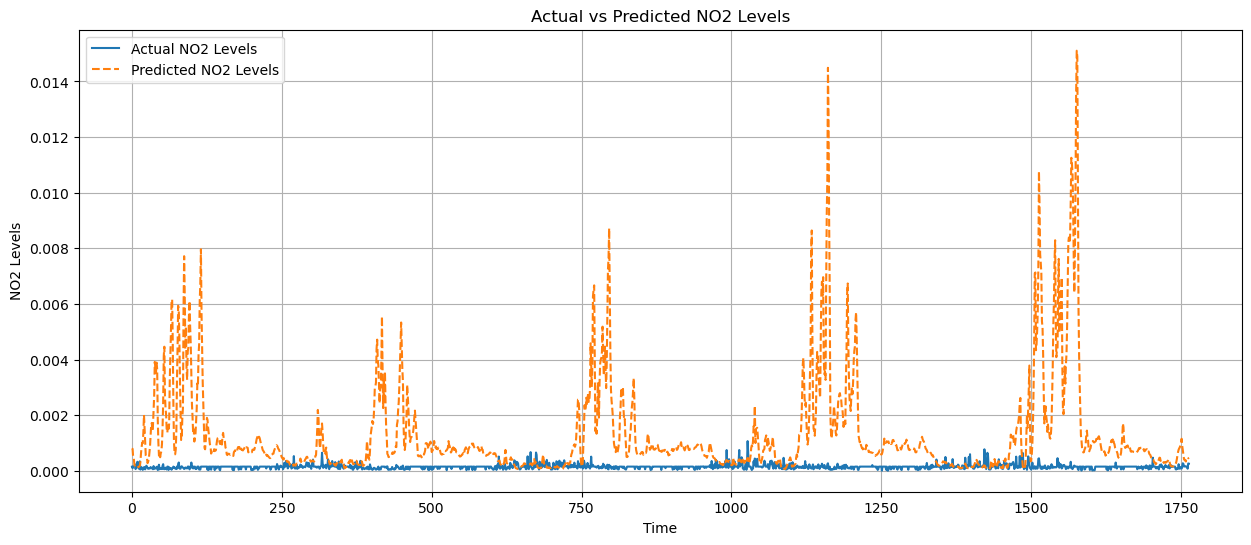

In [16]:
# Inverse transform the predictions and actual values using the 'no2' scaler
predictions = no2_scaler.inverse_transform(predictions)
y_test = no2_scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting actual vs predicted values
plt.figure(figsize=(15, 6))
plt.plot(y_test, label='Actual NO2 Levels')
plt.plot(predictions, label='Predicted NO2 Levels', linestyle='dashed')
plt.title('Actual vs Predicted NO2 Levels')
plt.xlabel('Time')
plt.ylabel('NO2 Levels')
plt.legend()
plt.grid(True)
plt.show()


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


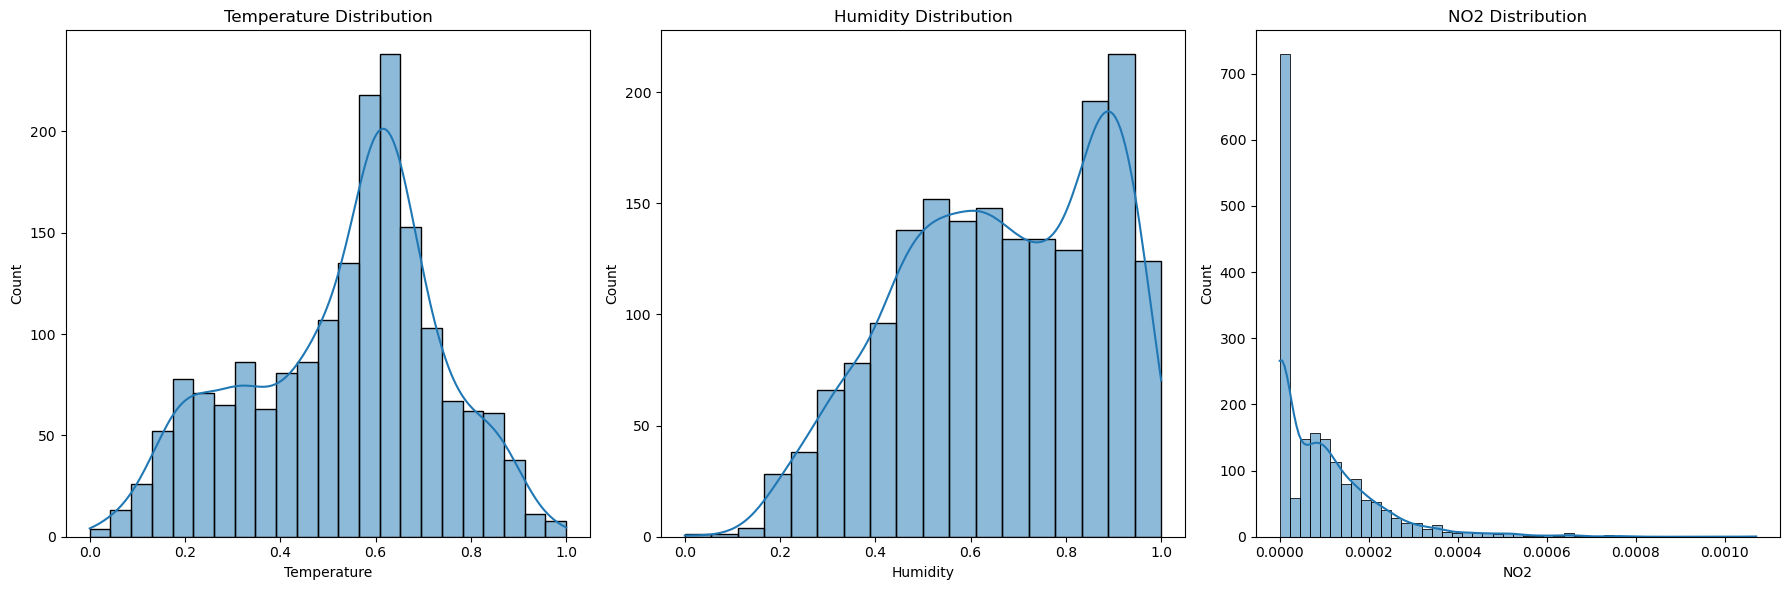

In [17]:
import seaborn as sns

# Plotting distribution of Temperature, Humidity, and NO2
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.histplot(data['Temperature'], kde=True)
plt.title('Temperature Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data['Humidity'], kde=True)
plt.title('Humidity Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data['NO2'], kde=True)
plt.title('NO2 Distribution')

plt.tight_layout()
plt.show()


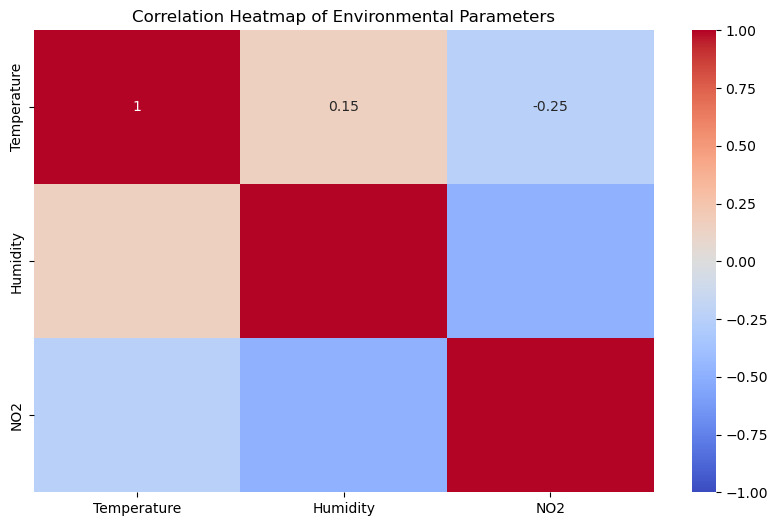

In [18]:
# Calculate the correlation matrix
corr_matrix = data[['Temperature', 'Humidity', 'NO2']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Environmental Parameters')
plt.show()


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print performance metrics
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2 Score: {r2}')


RMSE: 0.002113167429342866
MAE: 0.0011647260980680585
R2 Score: -580.2076183512563


In [20]:
import matplotlib.pyplot as plt

# Assuming 'history' is the History object returned by model.fit()
# history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.1, verbose=1)

# Plot training & validation loss values
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


NameError: name 'history' is not defined

<Figure size 1400x700 with 0 Axes>

In [21]:
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0040 - val_loss: 0.0594
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032 - val_loss: 0.0378
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0029 - val_loss: 0.0304
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0042 - val_loss: 0.0372
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0034 - val_loss: 0.0569
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0039 - val_loss: 0.0591
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0036 - val_loss: 0.0467
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0049 - val_loss: 0.0653
Epoch 9/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0035 - val_loss: 0.0757
Epoch 10/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0046 - val_loss: 0.0430
Epoch 11/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0033 - val_loss: 0.0428
Epoch 12/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0035 - val_lo

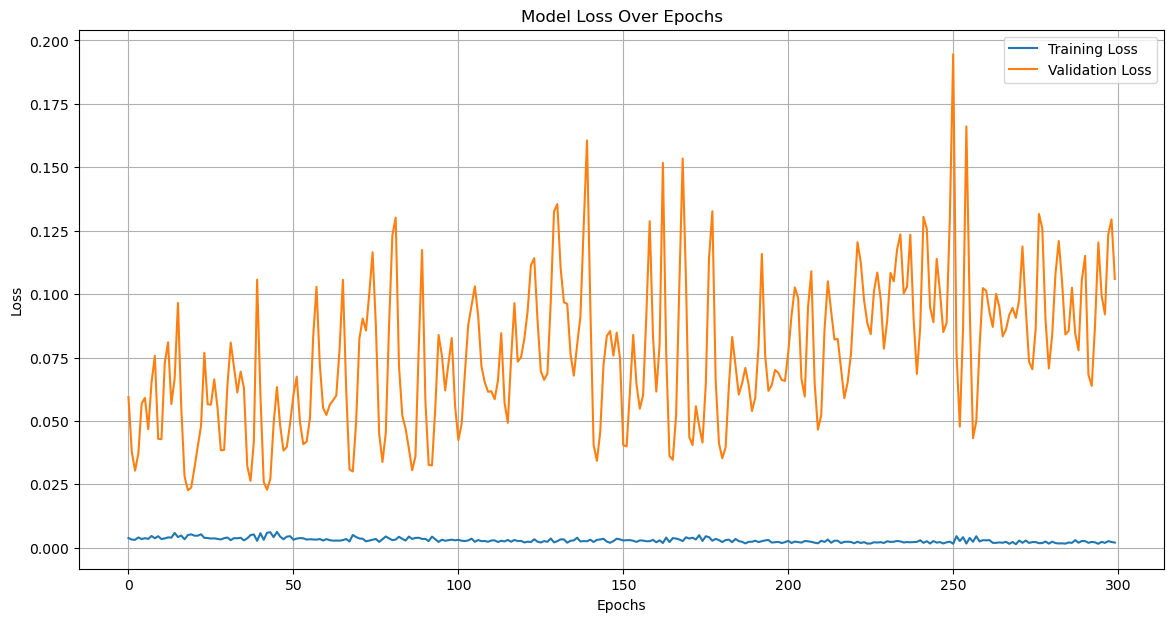

In [22]:
import matplotlib.pyplot as plt

# Assuming 'history' is the History object returned by model.fit()
# Ensure you run model.fit() and capture the history before plotting

# Plot training & validation loss values
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and preprocess data (Assuming data is loaded into 'data1')
# Ensure 'date' column is not included in normalization process
features_so2 = ['Temperature', 'Humidity', 'SO2']
features_no2 = ['Temperature', 'Humidity', 'NO2']
data1[features_so2] = data1[features_so2].astype(np.float32)
data1[features_no2] = data1[features_no2].astype(np.float32)

def create_sequences(data, sequence_length=1):
    xs, ys = [], []
    for i in range(len(data)-sequence_length):
        x = data.iloc[i:(i+sequence_length), :-1]
        y = data.iloc[i+sequence_length, -1]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 12

# Create sequences for SO2
X_so2, y_so2 = create_sequences(data1[features_so2], sequence_length)
X_so2 = X_so2.astype(np.float32)
y_so2 = y_so2.astype(np.float32)

# Create sequences for NO2
X_no2, y_no2 = create_sequences(data1[features_no2], sequence_length)
X_no2 = X_no2.astype(np.float32)
y_no2 = y_no2.astype(np.float32)

# Split into training and testing sets for SO2
train_size_so2 = 59
X_train_so2, X_test_so2 = X_so2[:train_size_so2], X_so2[train_size_so2:]
y_train_so2, y_test_so2 = y_so2[:train_size_so2], y_so2[train_size_so2:]

# Split into training and testing sets for NO2
train_size_no2 = 59
X_train_no2, X_test_no2 = X_no2[:train_size_no2], X_no2[train_size_no2:]
y_train_no2, y_test_no2 = y_no2[:train_size_no2], y_no2[train_size_no2:]


Epoch 1/300


C:\Users\kumar\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 572ms/step - accuracy: 0.0000e+00 - loss: 7.4493e-05 - val_accuracy: 0.0000e+00 - val_loss: 5.2433e-05
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0000e+00 - loss: 5.3201e-05 - val_accuracy: 0.0000e+00 - val_loss: 3.7298e-05
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: 2.0306e-05 - val_accuracy: 0.0000e+00 - val_loss: 7.0566e-05
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0000e+00 - loss: 2.7582e-05 - val_accuracy: 0.0000e+00 - val_loss: 3.3068e-06
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0000e+00 - loss: 6.7224e-06 - val_accuracy: 0.0000e+00 - val_loss: 2.7570e-05
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0000e+00 - loss: 1.9717e-05 - val_accuracy: 0.0000e+00 - val_loss: 3.9107e-06
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0000e+00 - loss: 3.8472e-06 - val_accuracy: 0.0000e+00 - val_loss: 1.5879e-05
Epoch 8/300
2/2 ━

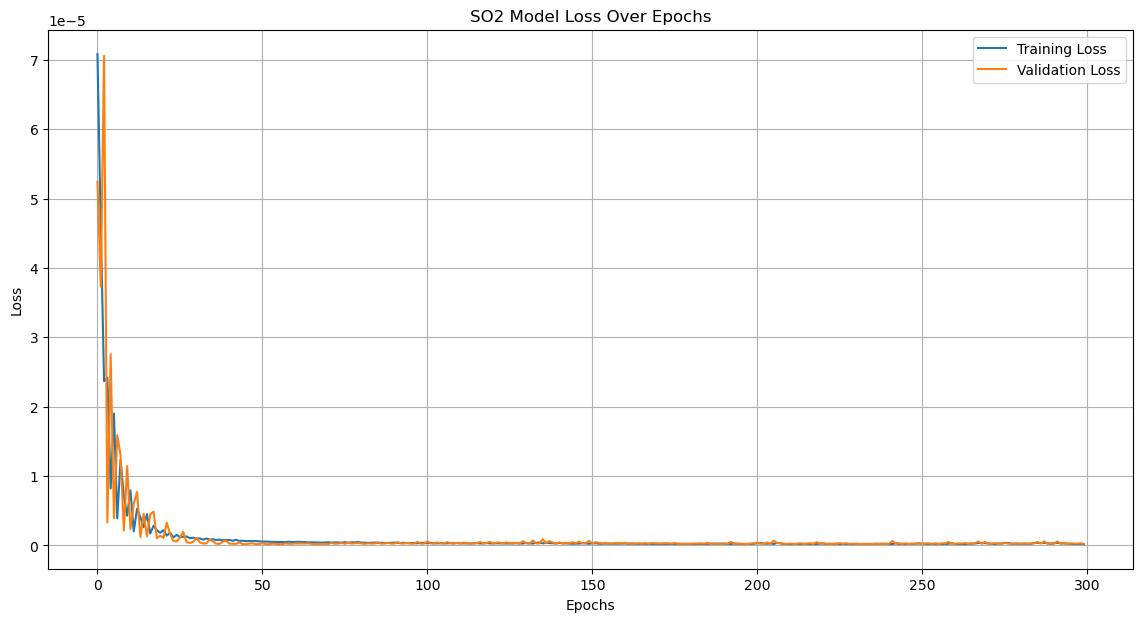

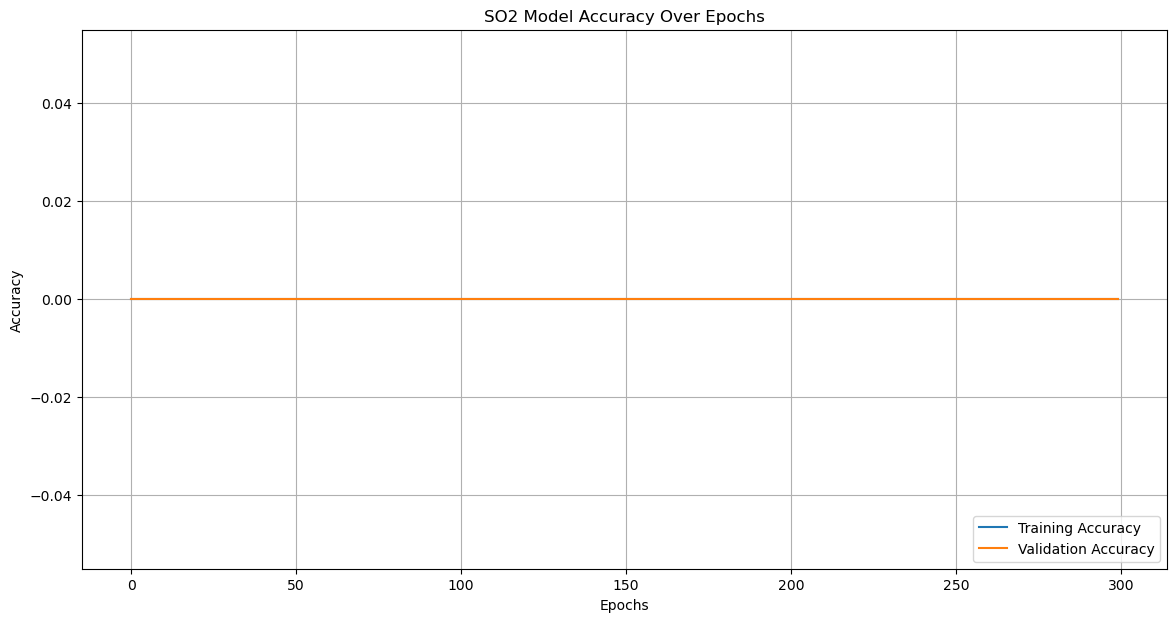

In [24]:
# Build the LSTM model for SO2
model_so2 = Sequential()
model_so2.add(LSTM(50, activation='relu', input_shape=(X_train_so2.shape[1], X_train_so2.shape[2])))
model_so2.add(Dense(1))
model_so2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model and capture history for SO2
history_so2 = model_so2.fit(X_train_so2, y_train_so2, epochs=300, batch_size=32, validation_split=0.1, verbose=1)

# Plot training & validation loss values for SO2
plt.figure(figsize=(14, 7))
plt.plot(history_so2.history['loss'], label='Training Loss')
plt.plot(history_so2.history['val_loss'], label='Validation Loss')
plt.title('SO2 Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plot training & validation accuracy values for SO2
plt.figure(figsize=(14, 7))
plt.plot(history_so2.history['accuracy'], label='Training Accuracy')
plt.plot(history_so2.history['val_accuracy'], label='Validation Accuracy')
plt.title('SO2 Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 277ms/step - accuracy: 0.0000e+00 - loss: 0.0331 - val_accuracy: 0.0000e+00 - val_loss: 0.0063
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0000e+00 - loss: 0.0261 - val_accuracy: 0.0000e+00 - val_loss: 0.0038
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0000e+00 - loss: 0.0228 - val_accuracy: 0.0000e+00 - val_loss: 0.0033
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: 0.0179 - val_accuracy: 0.0000e+00 - val_loss: 0.0050
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: 0.0156 - val_accuracy: 0.0000e+00 - val_loss: 0.0090
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0000e+00 - loss: 0.0152 - val_accuracy: 0.0000e+00 - val_loss: 0.0138
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0000e+00 - loss: 0.0148 - val_accuracy: 0.0000e+00 - val_loss: 0.0168
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy:

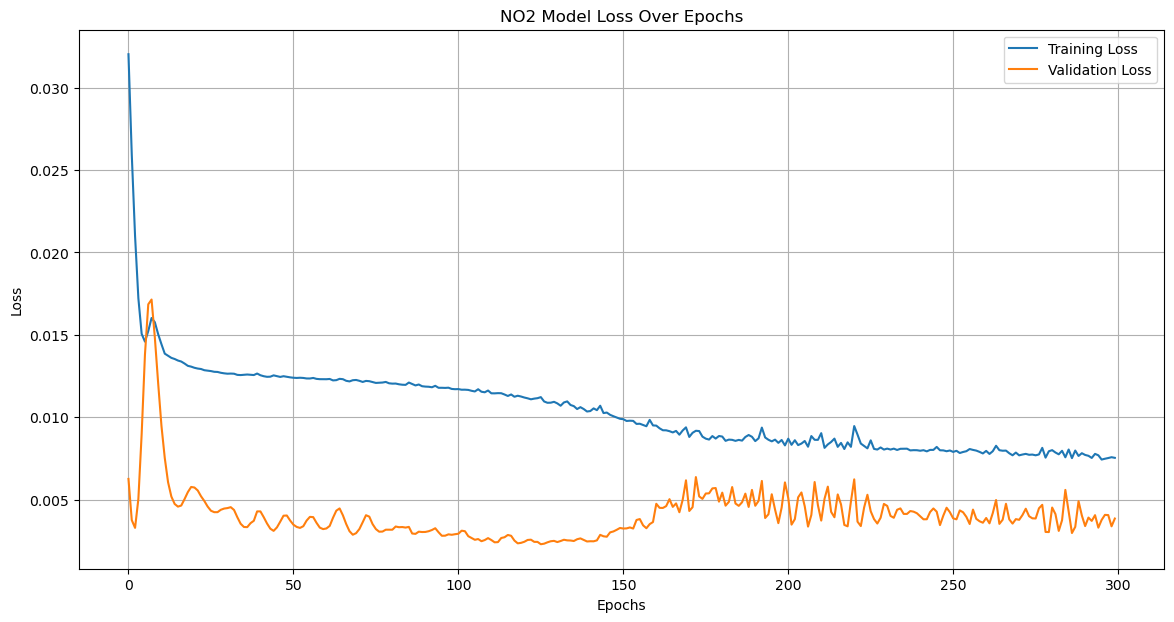

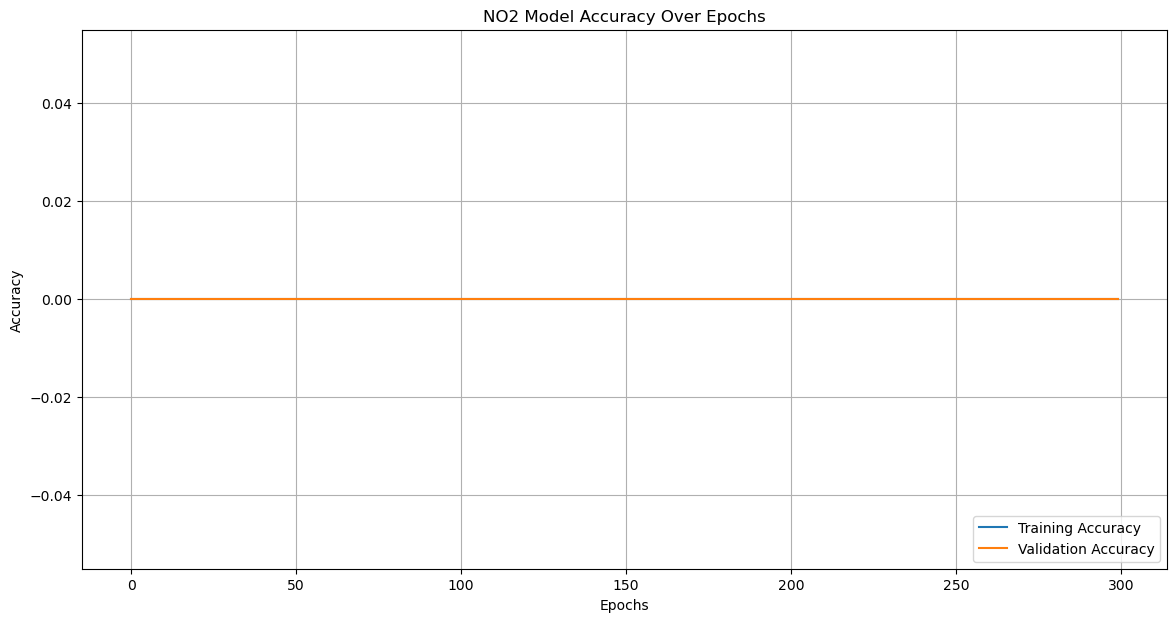

In [25]:
# Build the LSTM model for NO2
model_no2 = Sequential()
model_no2.add(LSTM(50, activation='relu', input_shape=(X_train_no2.shape[1], X_train_no2.shape[2])))
model_no2.add(Dense(1))
model_no2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model and capture history for NO2
history_no2 = model_no2.fit(X_train_no2, y_train_no2, epochs=300, batch_size=32, validation_split=0.1, verbose=1)

# Plot training & validation loss values for NO2
plt.figure(figsize=(14, 7))
plt.plot(history_no2.history['loss'], label='Training Loss')
plt.plot(history_no2.history['val_loss'], label='Validation Loss')
plt.title('NO2 Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plot training & validation accuracy values for NO2
plt.figure(figsize=(14, 7))
plt.plot(history_no2.history['accuracy'], label='Training Accuracy')
plt.plot(history_no2.history['val_accuracy'], label='Validation Accuracy')
plt.title('NO2 Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


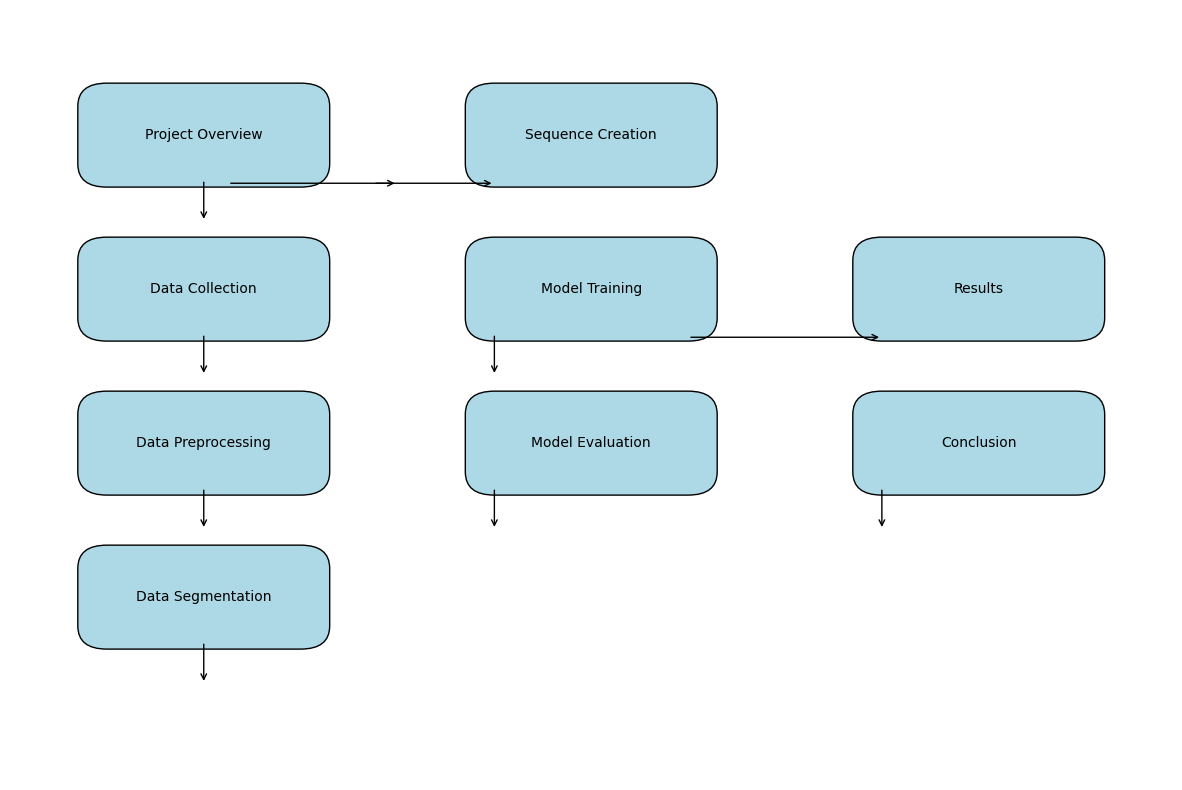

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(15, 10))

# Define a function to create text boxes with arrows
def create_box(ax, text, xy, boxstyle="round,pad=0.3", color="lightblue"):
    box = mpatches.FancyBboxPatch(xy, width=2, height=0.75, boxstyle=boxstyle, color=color, ec="black", lw=1)
    ax.add_patch(box)
    ax.text(xy[0] + 1, xy[1] + 0.375, text, va='center', ha='center', fontsize=10)

# Project Overview
create_box(ax, "Project Overview", (1, 8))
ax.annotate('', xy=(2, 7.25), xytext=(2, 7.8), arrowprops=dict(arrowstyle="->"))

# Data Collection
create_box(ax, "Data Collection", (1, 6))
ax.annotate('', xy=(2, 5.25), xytext=(2, 5.8), arrowprops=dict(arrowstyle="->"))

# Data Preprocessing
create_box(ax, "Data Preprocessing", (1, 4))
ax.annotate('', xy=(2, 3.25), xytext=(2, 3.8), arrowprops=dict(arrowstyle="->"))

# Data Segmentation
create_box(ax, "Data Segmentation", (1, 2))
ax.annotate('', xy=(2, 1.25), xytext=(2, 1.8), arrowprops=dict(arrowstyle="->"))

# Sequence Creation
create_box(ax, "Sequence Creation", (5, 8))
ax.annotate('', xy=(4, 7.75), xytext=(2.25, 7.75), arrowprops=dict(arrowstyle="->"))
ax.annotate('', xy=(5, 7.75), xytext=(3.75, 7.75), arrowprops=dict(arrowstyle="->"))

# Model Training
create_box(ax, "Model Training", (5, 6))
ax.annotate('', xy=(5, 5.25), xytext=(5, 5.8), arrowprops=dict(arrowstyle="->"))

# Model Evaluation
create_box(ax, "Model Evaluation", (5, 4))
ax.annotate('', xy=(5, 3.25), xytext=(5, 3.8), arrowprops=dict(arrowstyle="->"))

# Results
create_box(ax, "Results", (9, 6))
ax.annotate('', xy=(9, 5.75), xytext=(7, 5.75), arrowprops=dict(arrowstyle="->"))

# Conclusion
create_box(ax, "Conclusion", (9, 4))
ax.annotate('', xy=(9, 3.25), xytext=(9, 3.8), arrowprops=dict(arrowstyle="->"))

# Turn off axes
ax.set_xlim(0, 12)
ax.set_ylim(0, 10)
ax.axis('off')

# Save the image
plt.savefig("project_flowchart.png")
plt.show()
